**Problem 3.1** (3 pts)

In this problem we consider univariate function $f:\mathbb R\to\mathbb R$.
Let us remind the idea of bracketing method
> _Bracketing_ is the process of identifying an interval in which a local minimum lies and then successively shrinking the interval.

Implement the method `(a,b) = find_initial_bracket(f)` which for given function $f$ gives the bracketing interval $(a,b)$ such that there exist local minimum $c\in(a,b)$ satisfying $f(a)>f(c)<f(b)$.

In [1]:
import numpy as np
def find_initial_bracket(f, x=0, s=1e-2, k=2.0):
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    while True:
        c, yc = b + s, f(b + s)
        if yc > yb:
            if a > c:
                a, c = c, a
                return (a,c)
            else:
                return (a,c)
        a, ya, b, yb = b, yb, c, yc
        s = s*k

In [2]:
f = lambda x: 3*x**2 + np.exp(.3*x-9) + 20*x - 20
(a,b)= find_initial_bracket(f)
print((a,b))


(-5.109999999999999, -1.27)


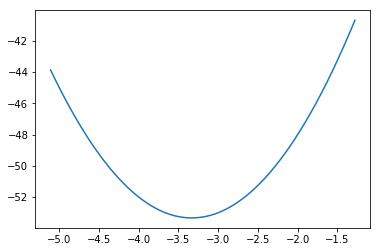

In [5]:
import matplotlib.pyplot as plt
x = np.arange(a, b, .01)
plt.plot(x, f(x))
plt.show()

**Problem 3.2** (4 pts)

In this problem we consider [unimodal function](https://www.wikiwand.com/en/Unimodality#/Unimodal_function)
and will play with _golden section search_ method.

First you should implement the _Fibonacci search_ algorithm provided that you have the (global) array of Fibonacci numbers. Next you should implement the _golden section search_ which uses only _golden ratio_ $\varphi = (1+\sqrt 5)/2$.

* Implement the [Fibonacci search algorithm](https://www.wikiwand.com/en/Golden-section_search#/Fibonacci_search)<br/>`(a, b) = fibonacci_search(f, a, b, n; ε=1e-4)`<br/>to be run on univariate function $f$, with bracketing interval $[a, b]$, for $n > 1$ function evaluations. It should return the new interval $(a, b)$. The optional parameter $\varepsilon$ should control the lowest-level interval length.
* Implement [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)<br/>`(a, b) = gs_search(f, a, b, n)`<br/> to be run on a univariate function $f$ , with bracketing interval $[a, b]$ , for $n > 1$ function evaluations. It returns the new interval $(a, b)$. Guaranteeing convergence to within $\varepsilon$ requires $n = (b-a)/(\varepsilon \ln\varphi)$.

Present the results on various kind of functions.

References:
- [Fibonacci Search in Optimization of Unimodal Functions](https://www.maplesoft.com/applications/view.aspx?SID=4193&view=html)
- [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)

# Fibbonaci

In [6]:
import numpy as np 

def Fib(n): 
    if n<2: 
        return n
    else: 
        return Fib(n-1)+Fib(n-2) 
  
  

f = lambda x: - x**2 + 21.6*x + 3


def fib_search(f,a,b,n,eps = 1e-4):
    
    n = n+3
    
    x1 = a + (Fib(n-2)*(b-a))/Fib(n)
    x2 = a + (Fib(n-1)*(b-a))/Fib(n)
    
    if b-a < eps:
            return[a,b]
    
    for i in range(1,n-2):
        
        
        yx1 = f(x1)
        yx2 = f(x2)
        
        if yx1 < yx2:
            a = x1
            x1 = x2
            x2 = a + (Fib(n-1-i)*(b-a))/Fib(n-i)
        
        else:
            b = x2
            x2 = x1
            x1 =a + (Fib(n-2-i)*(b-a))/Fib(n-i)
        
        print(f"[{round(a,4)},{round(b,4)}] with len {round(b-a,5)}, iter:{i}")
    
    return [a,b], round((a+b)/2,4)

To check how our function is doing we will try on on $f(x) = -x^2 + 21.6x +3$.

Of course we can check it for any other function.

In [10]:
f = lambda x: - x**2 + 21.6*x + 3
f2 = lambda x: - x**2 + 21.6*np.exp(x-15) + 3
f3 = lambda x: x**3 - x**4 + 21.6*np.exp(x-15) + 3 - np.log2(x**3-3*x**2)
fib_search(f3,0,50,20,.001)  # change f_ for the another outcome


[19.0983,50] with len 30.9017, iter:1
[30.9017,50] with len 19.0983, iter:2
[38.1966,50] with len 11.8034, iter:3
[42.7051,50] with len 7.2949, iter:4
[45.4915,50] with len 4.5085, iter:5
[47.2136,50] with len 2.7864, iter:6
[48.2779,50] with len 1.72209, iter:7
[48.9357,50] with len 1.06431, iter:8
[49.3422,50] with len 0.65778, iter:9
[49.5935,50] with len 0.40653, iter:10
[49.7488,50] with len 0.25125, iter:11
[49.8447,50] with len 0.15528, iter:12
[49.904,50] with len 0.09596, iter:13
[49.9407,50] with len 0.05932, iter:14
[49.9634,50] with len 0.03664, iter:15
[49.9773,50] with len 0.02268, iter:16
[49.986,50] with len 0.01396, iter:17
[49.9913,50] with len 0.00872, iter:18
[49.9948,50] with len 0.00523, iter:19
[49.9965,50] with len 0.00349, iter:20


([49.99651045119866, 50], 49.9983)

# Golden section 

In [14]:
from math import * 


def gs_search(f,a,b,n):
    
    gr = (sqrt(5) + 1) / 2
    
    x1 = b - (b - a) / gr # dzieli tak samo jak fibbonci
    x2 = a + (b - a) / gr
    
    for i in range(n):
        
        if f(x1) < f(x2):
            a = x1
        else:
            b = x2
            
        x1 = b - (b - a) / gr # dzieli tak samo jak fibbonci
        x2 = a + (b - a) / gr
        
        #print(f"[{round(a,4)},{round(b,4)}] with len {round(b-a,5)}, iter:{i},value {round(min(f(x1),f(x2)),3)}")
        
    return[a,b]

In [15]:
f_intresting =lambda y: (y-2)**2
f = lambda x: - x**2 + 21.6*x + 3
f2 = lambda x: - x**2 + 21.6*np.exp(x-15) + 3
f3 = lambda x: x**3 - x**4 + 21.6*np.exp(x-15) + 3 - np.log2(x**3-3*x**2)

gr = (sqrt(5) + 1) / 2
eps = 1e-4
n =int(round( 4/(eps*np.log(gr))))
gs_search(f_intresting,1,5,n) # change f_ for the another outcome

[4.9999999999999964, 4.999999999999997]

**Problem 3.3.** (5 pts)

Observe that the previous methods require only to evaluate the value of the objective function $f$.
From now we assume we know also its derivative.<br/>
For example, consider the function
$$ f(x) = x^4 + 16x^2 + 18(x-4) e^x\qquad (x\in\mathbb R). $$

***For the next results this is extremley important that if we want to change fuction we should do this in chunk below.Otherwise my_func will always give results of the function that was previously assigned. Our first function is defined as f. To have another function simply change the foruma after '=' mark. *** 

In [37]:
from sympy import * 
import numpy as np

x = Symbol('x')
f = x**4 + 16*x**2 + 18*(x-4)*exp(x)
#f = x**2 + 2 - x**4 * log(x**7-3942638)
f_prime = diff(f)
f = lambdify(x,f)
f_prime = lambdify(x, f_prime)
def my_func(x,order = 0):
    value = f(x)
    if order == 0:
        return value
    elif order ==1:
        gradient = f_prime(x)
    return value,gradient

v,g = my_func(4,1)
v,g

(512.0, 1366.7667005965964)

# Bisection 

In [27]:
def bisection(MIN,MAX,epsilon = 1e-5, max_iter = 65536):
    counter = 0 
    while counter <= max_iter:
        counter += 1 
        MID = (MAX + MIN) / 2
        
        value,gradient = my_func(MID,order = 1)
        
        #TODO: suboptimality 
        
        suboptimality = MAX - MIN
        
        if suboptimality <= epsilon:
            break
        
        if gradient > 0:
            MAX = MID
            
        else:
            MIN = MID
        
        print(f"Interval is {[MIN,MAX]}")
        print(f"Number of iterations {counter}")
        print(f"Suboptimal point{MID}")
        print(f"Suboptimal value {value}")
        
    return MID

In [32]:
bisection(-10,10)

Interval is [0.0, 10]
Number of iterations 1
Suboptimal point0.0
Suboptimal value (2+0j)
Interval is [5.0, 10]
Number of iterations 2
Suboptimal point5.0
Suboptimal value (-9452.59139342334-1963.4954084936207j)
Interval is [7.5, 10]
Number of iterations 3
Suboptimal point7.5
Suboptimal value (-46687.66373180734-9940.195505498954j)
Interval is [7.5, 8.75]
Number of iterations 4
Suboptimal point8.75
Suboptimal value (-56547.0242461581-18415.43935856712j)
Interval is [8.125, 8.75]
Number of iterations 5
Suboptimal point8.125
Suboptimal value (-62202.94904359106-13691.257900875562j)
Interval is [8.4375, 8.75]
Number of iterations 6
Suboptimal point8.4375
Suboptimal value (-69403.08883494341-15922.271169819005j)
Interval is [8.59375, 8.75]
Number of iterations 7
Suboptimal point8.59375
Suboptimal value (-71285.04790120028-17134.86687884039j)
Interval is [8.59375, 8.671875]
Number of iterations 8
Suboptimal point8.671875
Suboptimal value (-70317.08673731722-17766.501187116075j)
Interval is [

8.598952293395996

**Problem 3.4** (3 pts)

Implement the *line_search* algorithm, which general idea is as follow:
```julia
function line_search(f, x, d)
    objective = α -> f(x + α*d)
    a, b = bracket_minimum(objective)
    α = minimize(objective, a, b)
    return x + α*d
end
```

I'm extremley sorry but I really dont know how it should work and Julia code is not makeing it simpler for me. 
To do something that is correlated with this problem I implemented method from 
[Line search](https://en.wikipedia.org/wiki/Line_search)<br/> 
What is show belowe is `Example use` from this webside. I also changed it a bit. I'm starting from default alpha and moving through the X axis. When I see that sign of my gradinet has changed i know tha I have to go in opposite direction direction but in the same time I'm making alpha smaller. This is working prety well for both cases when $x_0$ is close or very far from the optimal minimal x. Function is ending when value of the   absolute value of gradinet is smaller then epsilon or when number of iterations is done.

In [35]:
def exact_line_search(f,k,direction, eps = 1e-9,max_iter = 65536):
    counter = 0 
    alpha = 10
    x_k = k
    value,grad = my_func(k,order = 1)
    
    while counter <= max_iter:
        
        counter += 1
        x_k = x_k + alpha*direction
        value_k,grad_k = my_func(x_k,order = 1)
        
        if np.sign(grad) != np.sign(grad_k):
            direction = -1*direction
            alpha *= 0.1
        
        grad = grad_k
        
        if abs(grad) <= eps:
            break
        
#        if alpha <= eps:
#            break
        
        print(f"Number of iterations {counter}")
        print(f"my x is  {x_k}")
        print(f"line_search value {value_k}")
        
    return x_k,value_k,grad

In [38]:
exact_line_search(f,0,1)

Number of iterations 1
my x is  10
line_search value 2390458.3058391255
Number of iterations 2
my x is  9.0
line_search value 737134.5534817845
Number of iterations 3
my x is  8.0
line_search value 219748.97506700445
Number of iterations 4
my x is  7.0
line_search value 62403.19055513676
Number of iterations 5
my x is  6.0
line_search value 16395.436565738462
Number of iterations 6
my x is  5.0
line_search value 3696.436863846379
Number of iterations 7
my x is  4.0
line_search value 512.0
Number of iterations 8
my x is  3.0
line_search value -136.53966461737804
Number of iterations 9
my x is  2.0
line_search value -186.00601956150342
Number of iterations 10
my x is  2.1
line_search value -189.27491100981365
Number of iterations 11
my x is  2.2
line_search value -191.5448373816655
Number of iterations 12
my x is  2.3000000000000003
line_search value -192.58588311733044
Number of iterations 13
my x is  2.4000000000000004
line_search value -192.12987976247817
Number of iterations 14
my x 

(2.322324583129999, -192.62418183070685, 2.461888470861595e-10)

**Problem 3.5.** (3 pts)

# Backtracking_line_search

In [40]:
def backtracking_line_search( f, k, direction, alpha=0.4, beta=0.9, maximum_iterations=65536 ):
    counter = 0 
    value,grad = my_func(k,order = 1)
    x_k = k + alpha*direction
    value_k,grad_k = my_func(x_k,order = 1)
    
    if grad*direction < 0 :
        pass
    else:
        direction = -1*direction
    
    while value + alpha*beta*grad*direction < value_k:
        alpha = 1/2 *alpha
        x_k = k + alpha*direction
        value_k,grad_k = my_func(x_k,order = 1)
        counter += 1 
        
        print(f"my alpha {alpha}")
        
        if counter > maximum_iterations:
            break
    
    return alpha

To make it complicated for the backtracking_line_search f function we will set $f(x) = x^2$ and intial $x_0$ very close to optimal minimum. So alpha really needs to 'melt'.

In [42]:
x = Symbol('x')
f = x**2
f_prime = diff(f)
f = lambdify(x,f)
f_prime = lambdify(x, f_prime)       

backtracking_line_search( f, 0.01, 1, alpha=0.4, beta=0.9, maximum_iterations=65536 )

my alpha 0.2
my alpha 0.1
my alpha 0.05
my alpha 0.025
my alpha 0.0125
my alpha 0.00625
my alpha 0.003125
my alpha 0.0015625


0.0015625

***Please if You will have any questions sir, let me know and we will try to figure out what is going on in this madness ;)***

Made and described by Szymon Czop s292913